In [1]:
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Week_8_Q&A_dataset - Sheet1.csv")

# 1. Descriptive Analytics

In [3]:
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [4]:
data.tail()

,Gender,Test preparation,Total Marks
23,female,none,27
24,female,none,27
25,female,none,38
26,female,completed,50
27,female,completed,43


# Numerical/Statistical analysis of the dataset

In [5]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


# Dimensions of dataset

In [6]:
print('There are ',data.shape[0],'rows and ',data.shape[1],'columns in the dataset.')

There are  28 rows and  3 columns in the dataset.


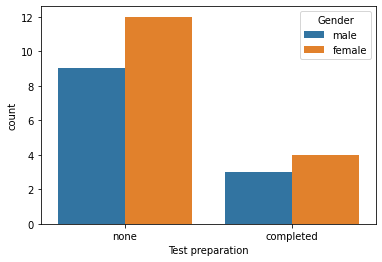

In [7]:
plt.figure()
ax=sns.countplot(x='Test preparation',data=data,hue='Gender')
plt.show()

The above graph shows the male and female students who has completed and has not completed the test preparation.

# Checking if there are repeated values in the dataset or not.

In [8]:
data.isnull().sum()

Gender              0
Test preparation    0
Total Marks         0
dtype: int64

Inference: There are no null values in the dataset.

# Schema of dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


# 2. To check whether female and male students scored the same marks

H0 : Mean Score of female students > Mean Score of male students

H1 : Mean Score of female students <= Mean Score of male students

In [10]:
data.groupby("Gender").mean()

,Total Marks
Gender,
female,33.750000
male,30.416667


In [11]:
grouped=data.groupby("Gender")
male=grouped.get_group('male')
female=grouped.get_group('female')

In [12]:
male

,Gender,Test preparation,Total Marks
0,male,none,14
6,male,none,30
8,male,none,18
9,male,none,24
10,male,completed,44
11,male,none,23
12,male,completed,43
13,male,none,28
18,male,none,47
19,male,none,36


In [13]:
female

,Gender,Test preparation,Total Marks
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21
5,female,completed,40
7,female,none,12
14,female,none,41
15,female,none,13
16,female,completed,48
17,female,none,45


In [14]:
ttest,pval = ttest_ind(female["Total Marks"],male["Total Marks"],alternative="greater")
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis i.e. Mean Score of female students <= Mean Score of male students")
else:
  print("We accept null hypothesis i.e. Mean Score of female students > Mean Score of male students")

p-value 0.24689111589803814
We accept null hypothesis i.e. Mean Score of female students > Mean Score of male students


# 3. To check whether test preparation helps the students

H0 : Mean Score of students who completed the test preparation > Mean Score of students who did not complete the test preparation 

H1 : Mean Score of students who completed the test preparation <= Mean Score of students who did not complete the test preparation 

In [15]:
mean=data.groupby('Test preparation').mean()

In [16]:
mean

,Total Marks
Test preparation,
completed,44.571429
none,28.238095


In [17]:
grouped=data.groupby("Test preparation")
not_completed=grouped.get_group('none')
completed=grouped.get_group('completed')

In [18]:
ttest,pval = ttest_ind(completed['Total Marks'],not_completed['Total Marks'],alternative='greater')
print("p-value",pval)
if pval <0.05:
  print("We reject null hypothesis i.e. Mean Score of students who completed the test preparation <= Mean Score of students who did not complete the test preparation")
else:
  print("We accept null hypothesis i.e. Mean Score of students who completed the test preparation > Mean Score of students who did not complete the test preparation")

p-value 0.0006335646228660055
We reject null hypothesis i.e. Mean Score of students who completed the test preparation <= Mean Score of students who did not complete the test preparation
